In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset

torch.manual_seed(0)
np.random.seed(0)

#X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
sheets = pd.read_excel('nissan.xlsx', sheet_name=None)
titles={0:'Nissan_Leaf_Charge_3kW',1:'Nissan_Leaf_Charge_AC_22kW',2:'Nissan_Leaf_Chademo_DC_50kW'}

sheets[titles[0]].columns=sheets[titles[0]].iloc[5]
sheets[titles[0]]=sheets[titles[0]].iloc[6:]
sheets[titles[0]].reset_index(drop=True,inplace=True)
sheets[titles[0]].rename_axis(columns=titles[0],inplace=True)

sheets[titles[1]].columns=sheets[titles[1]].iloc[4]
sheets[titles[1]]=sheets[titles[1]].iloc[5:]
sheets[titles[1]].reset_index(drop=True,inplace=True)
sheets[titles[1]].rename_axis(columns=titles[1],inplace=True)

sheets[titles[2]].columns=sheets[titles[2]].iloc[4]
sheets[titles[2]]=sheets[titles[2]].iloc[5:]
sheets[titles[2]].reset_index(drop=True,inplace=True)
sheets[titles[2]].rename_axis(columns=titles[2],inplace=True)
sheets[titles[0]]

Nissan_Leaf_Charge_3kW,Heure (en s),Batterie (haut voltage): Valeur de courant (en A),Batterie (haut voltage): Tension (en V),Batterie HV tension de cellule mini. (en mV),Batterie HV tension de cellule maxi. (en mV),Batterie (haut voltage): Température 1 (en °C),Batterie (haut voltage): Température 4 (en °C),Etat de charge SOC(%)
0,0,-0.10,376,3906,3919,20,19,73.70
1,0.82,-0.20,376,3906,3919,20,19,73.70
2,1.67,0,376,3905,3918,20,19,73.70
3,2.46,0,376,3904,3919,20,19,73.70
4,3.29,0,376,3905,3919,20,19,73.70
...,...,...,...,...,...,...,...,...
532,428.02,9.20,378,3931,3946,20,19,74.60
533,428.82,-1,378,3927,3941,20,19,74.60
534,429.63,-0.90,378,3927,3941,20,19,74.60
535,430.46,-1.20,378,3927,3940,20,19,74.60


<Axes: title={'center': 'Nissan_Leaf_Chademo_DC_50kW'}, xlabel='Heure (en s)'>

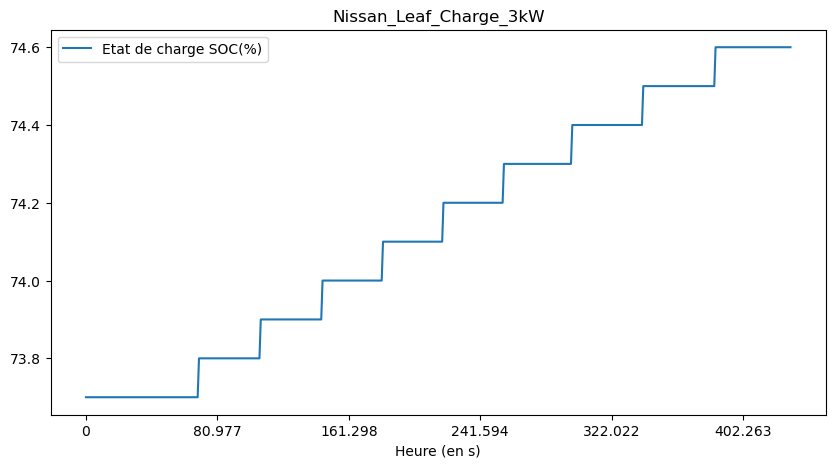

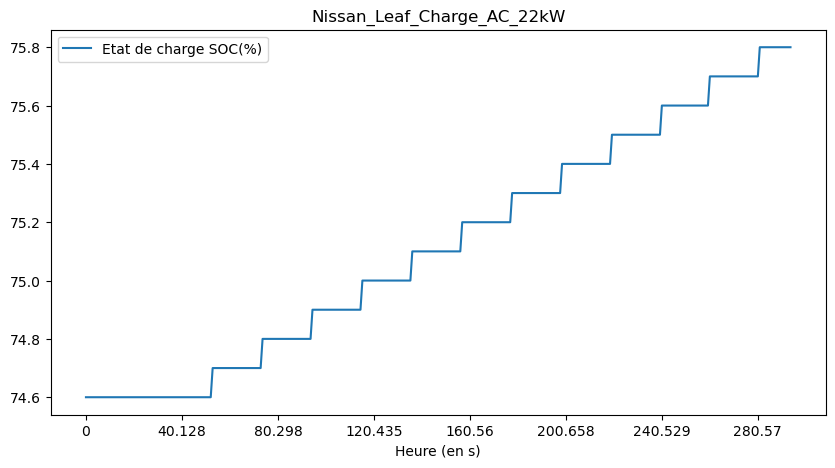

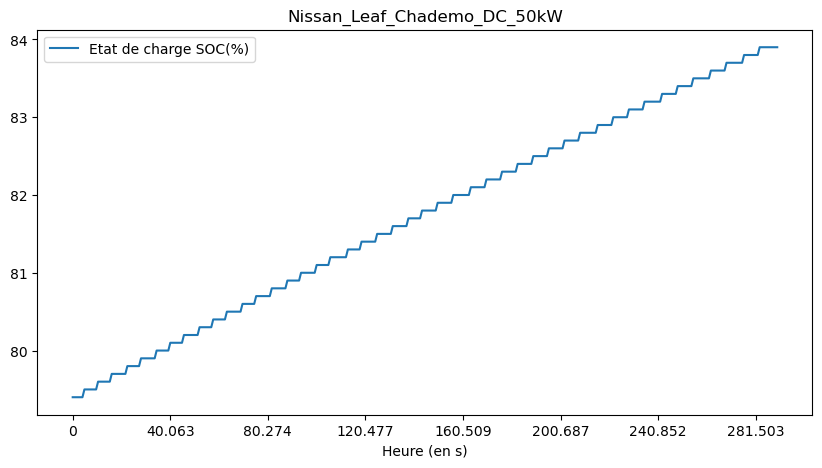

In [31]:
sheets[titles[0]].plot(x='Heure (en s)',y='Etat de charge SOC(%)',title=titles[0],figsize=(10,5))
sheets[titles[1]].plot(x='Heure (en s)',y='Etat de charge SOC(%)',title=titles[1],figsize=(10,5))
sheets[titles[2]].plot(x='Heure (en s)',y='Etat de charge SOC(%)',title=titles[2],figsize=(10,5))

<Axes: title={'center': 'Nissan_Leaf_Chademo_DC_50kW'}, xlabel='Heure (en s)'>

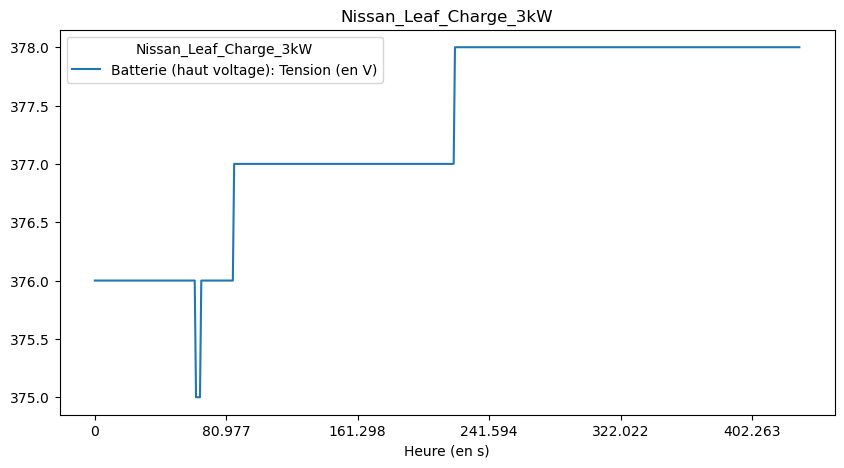

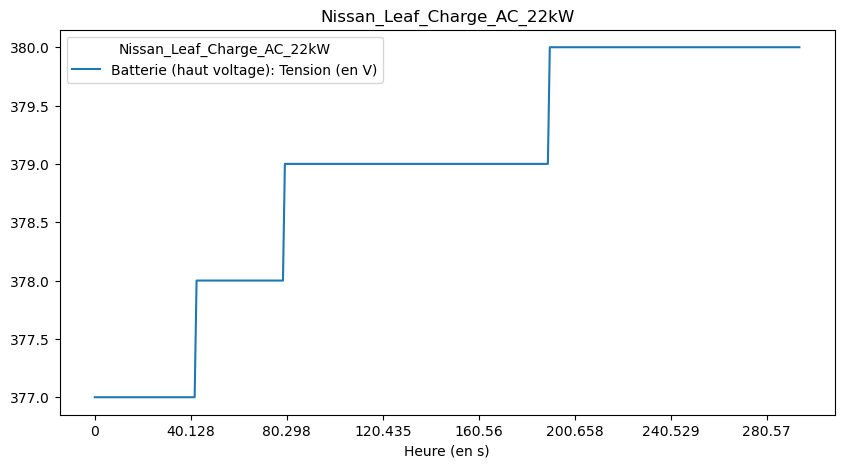

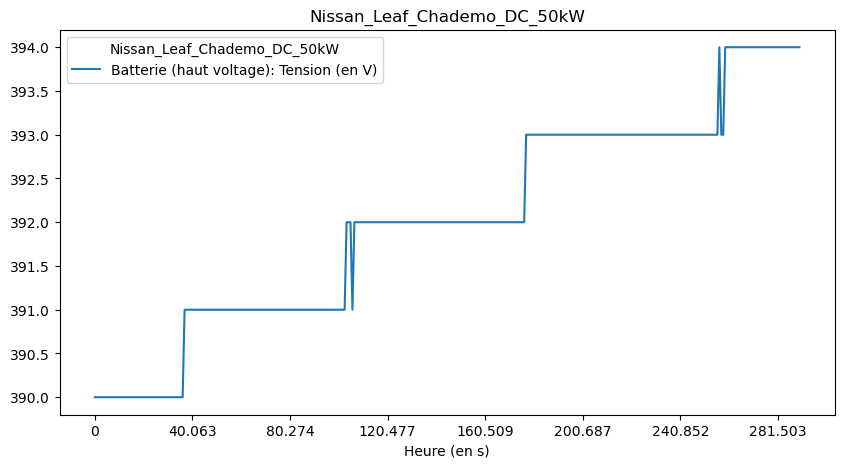

In [32]:
sheets[titles[0]].plot(x='Heure (en s)',y=['Batterie (haut voltage): Tension (en V)'],title=titles[0],figsize=(10,5))
sheets[titles[1]].plot(x='Heure (en s)',y=['Batterie (haut voltage): Tension (en V)'],title=titles[1],figsize=(10,5))
sheets[titles[2]].plot(x='Heure (en s)',y=['Batterie (haut voltage): Tension (en V)'],title=titles[2],figsize=(10,5))

<Axes: title={'center': 'Nissan_Leaf_Chademo_DC_50kW'}, xlabel='Heure (en s)'>

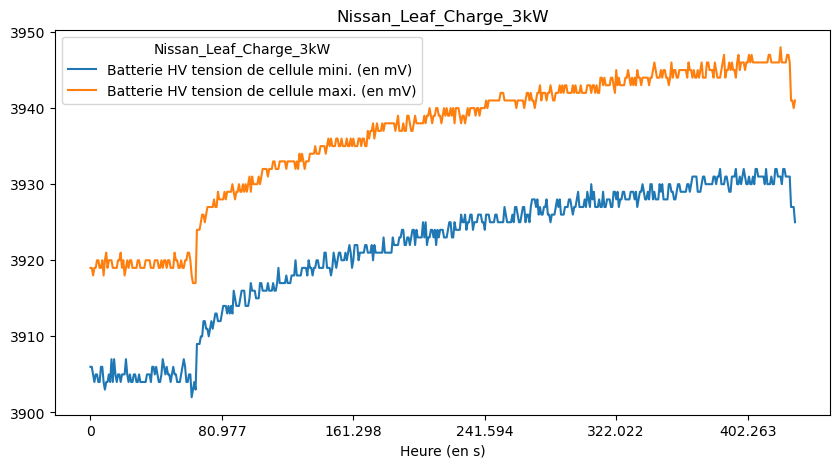

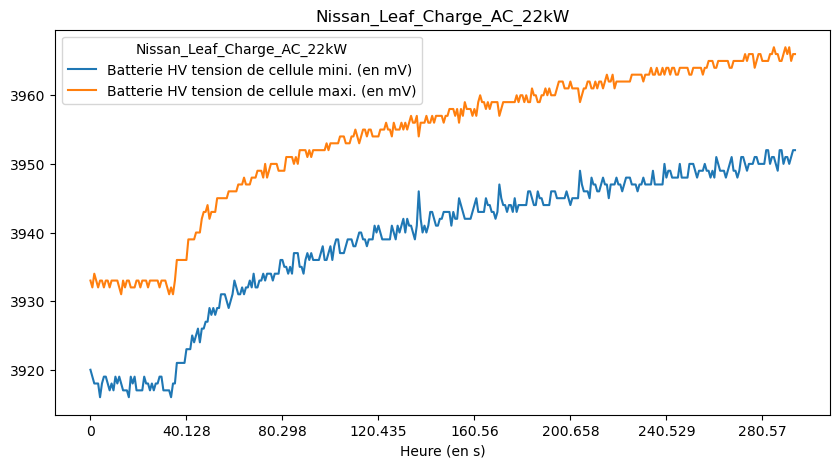

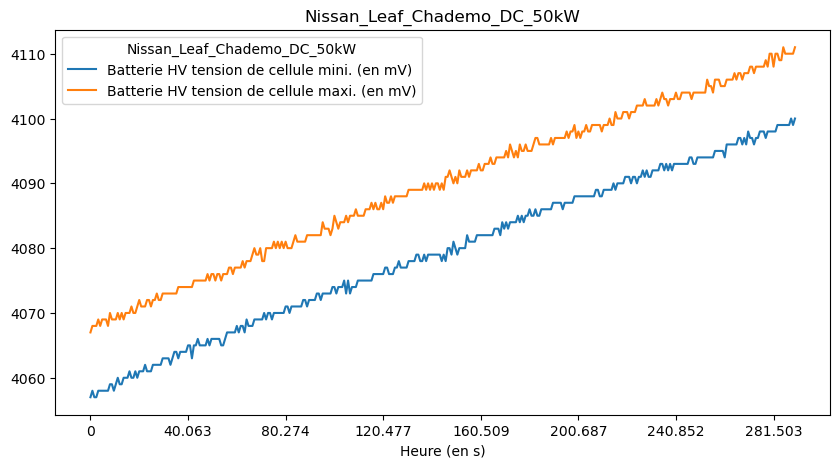

In [33]:
sheets[titles[0]].plot(x='Heure (en s)',y=['Batterie HV tension de cellule mini. (en mV)','Batterie HV tension de cellule maxi. (en mV)'],title=titles[0],figsize=(10,5))
sheets[titles[1]].plot(x='Heure (en s)',y=['Batterie HV tension de cellule mini. (en mV)','Batterie HV tension de cellule maxi. (en mV)'],title=titles[1],figsize=(10,5))
sheets[titles[2]].plot(x='Heure (en s)',y=['Batterie HV tension de cellule mini. (en mV)','Batterie HV tension de cellule maxi. (en mV)'],title=titles[2],figsize=(10,5))

In [34]:
for i in range(3):
    sheets[titles[i]]['Vmin']=(sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)']-sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)'].min())/(sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)'].max()-sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)'].min())
    sheets[titles[i]]['Vmax']=(sheets[titles[i]]['Batterie HV tension de cellule maxi. (en mV)']-sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)'].min())/(sheets[titles[i]]['Batterie HV tension de cellule maxi. (en mV)'].max()-sheets[titles[i]]['Batterie HV tension de cellule mini. (en mV)'].min())
sheets[titles[0]]

Nissan_Leaf_Charge_3kW,Heure (en s),Batterie (haut voltage): Valeur de courant (en A),Batterie (haut voltage): Tension (en V),Batterie HV tension de cellule mini. (en mV),Batterie HV tension de cellule maxi. (en mV),Batterie (haut voltage): Température 1 (en °C),Batterie (haut voltage): Température 4 (en °C),Etat de charge SOC(%),Vmin,Vmax
0,0,-0.10,376,3906,3919,20,19,73.70,0.13,0.37
1,0.82,-0.20,376,3906,3919,20,19,73.70,0.13,0.37
2,1.67,0,376,3905,3918,20,19,73.70,0.10,0.35
3,2.46,0,376,3904,3919,20,19,73.70,0.07,0.37
4,3.29,0,376,3905,3919,20,19,73.70,0.10,0.37
...,...,...,...,...,...,...,...,...,...,...
532,428.02,9.20,378,3931,3946,20,19,74.60,0.97,0.96
533,428.82,-1,378,3927,3941,20,19,74.60,0.83,0.85
534,429.63,-0.90,378,3927,3941,20,19,74.60,0.83,0.85
535,430.46,-1.20,378,3927,3940,20,19,74.60,0.83,0.83


In [35]:
from scipy.stats import pearsonr

for i in range(3):

    r,p=pearsonr(sheets[titles[i]]['Vmin'].values,sheets[titles[i]]['Etat de charge SOC(%)'].values)
    print(f'{titles[i]}: Vmin vs Etat de charge SOC(%): {r:.2f} (p={p:.2e})')
    r,p=pearsonr(sheets[titles[i]]['Vmax'].values,sheets[titles[i]]['Etat de charge SOC(%)'].values)
    print(f'{titles[i]}: Vmax vs Etat de charge SOC(%): {r:.2f} (p={p:.2e})')

Nissan_Leaf_Charge_3kW: Vmin vs Etat de charge SOC(%): 0.94 (p=2.43e-246)
Nissan_Leaf_Charge_3kW: Vmax vs Etat de charge SOC(%): 0.93 (p=4.61e-242)
Nissan_Leaf_Charge_AC_22kW: Vmin vs Etat de charge SOC(%): 0.91 (p=1.17e-142)
Nissan_Leaf_Charge_AC_22kW: Vmax vs Etat de charge SOC(%): 0.91 (p=1.15e-141)
Nissan_Leaf_Chademo_DC_50kW: Vmin vs Etat de charge SOC(%): 1.00 (p=0.00e+00)
Nissan_Leaf_Chademo_DC_50kW: Vmax vs Etat de charge SOC(%): 1.00 (p=0.00e+00)


In [98]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

datasets={}

for i in range(3):
    train_df, val_df = train_test_split(sheets[titles[i]][['Vmin','Vmax','Etat de charge SOC(%)']], train_size=int(0.7*len(sheets[titles[i]])), random_state=42)
    X_train = train_df[['Vmin','Vmax']].values.astype(np.float32)
    y_train = train_df['Etat de charge SOC(%)'].values.astype(np.float32)
    X_test = val_df[['Vmin','Vmax']].values.astype(np.float32)
    y_test = val_df['Etat de charge SOC(%)'].values.astype(np.float32)

    datasets[i]={'X_train':X_train,
                'y_train':y_train,
                'X_test':X_test,
                'y_test':y_test}

In [101]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None,predictions=True)
models, predictions = reg.fit(datasets[0]['X_train'],datasets[0]['X_test'],datasets[0]['y_train'],datasets[0]['y_test'])
models=models[models['RMSE']<0.1]
models

100%|██████████| 42/42 [00:00<00:00, 59.62it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 375, number of used features: 2
[LightGBM] [Info] Start training from score 74.139733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,0.05,0.04
ExtraTreeRegressor,0.97,0.97,0.05,0.00
XGBRegressor,0.97,0.97,0.05,0.01
RandomForestRegressor,0.97,0.97,0.05,0.06
BaggingRegressor,0.97,0.97,0.05,0.01
GradientBoostingRegressor,0.97,0.97,0.05,0.05
DecisionTreeRegressor,0.97,0.97,0.05,0.00
HistGradientBoostingRegressor,0.97,0.97,0.05,0.07
LGBMRegressor,0.97,0.97,0.05,0.02


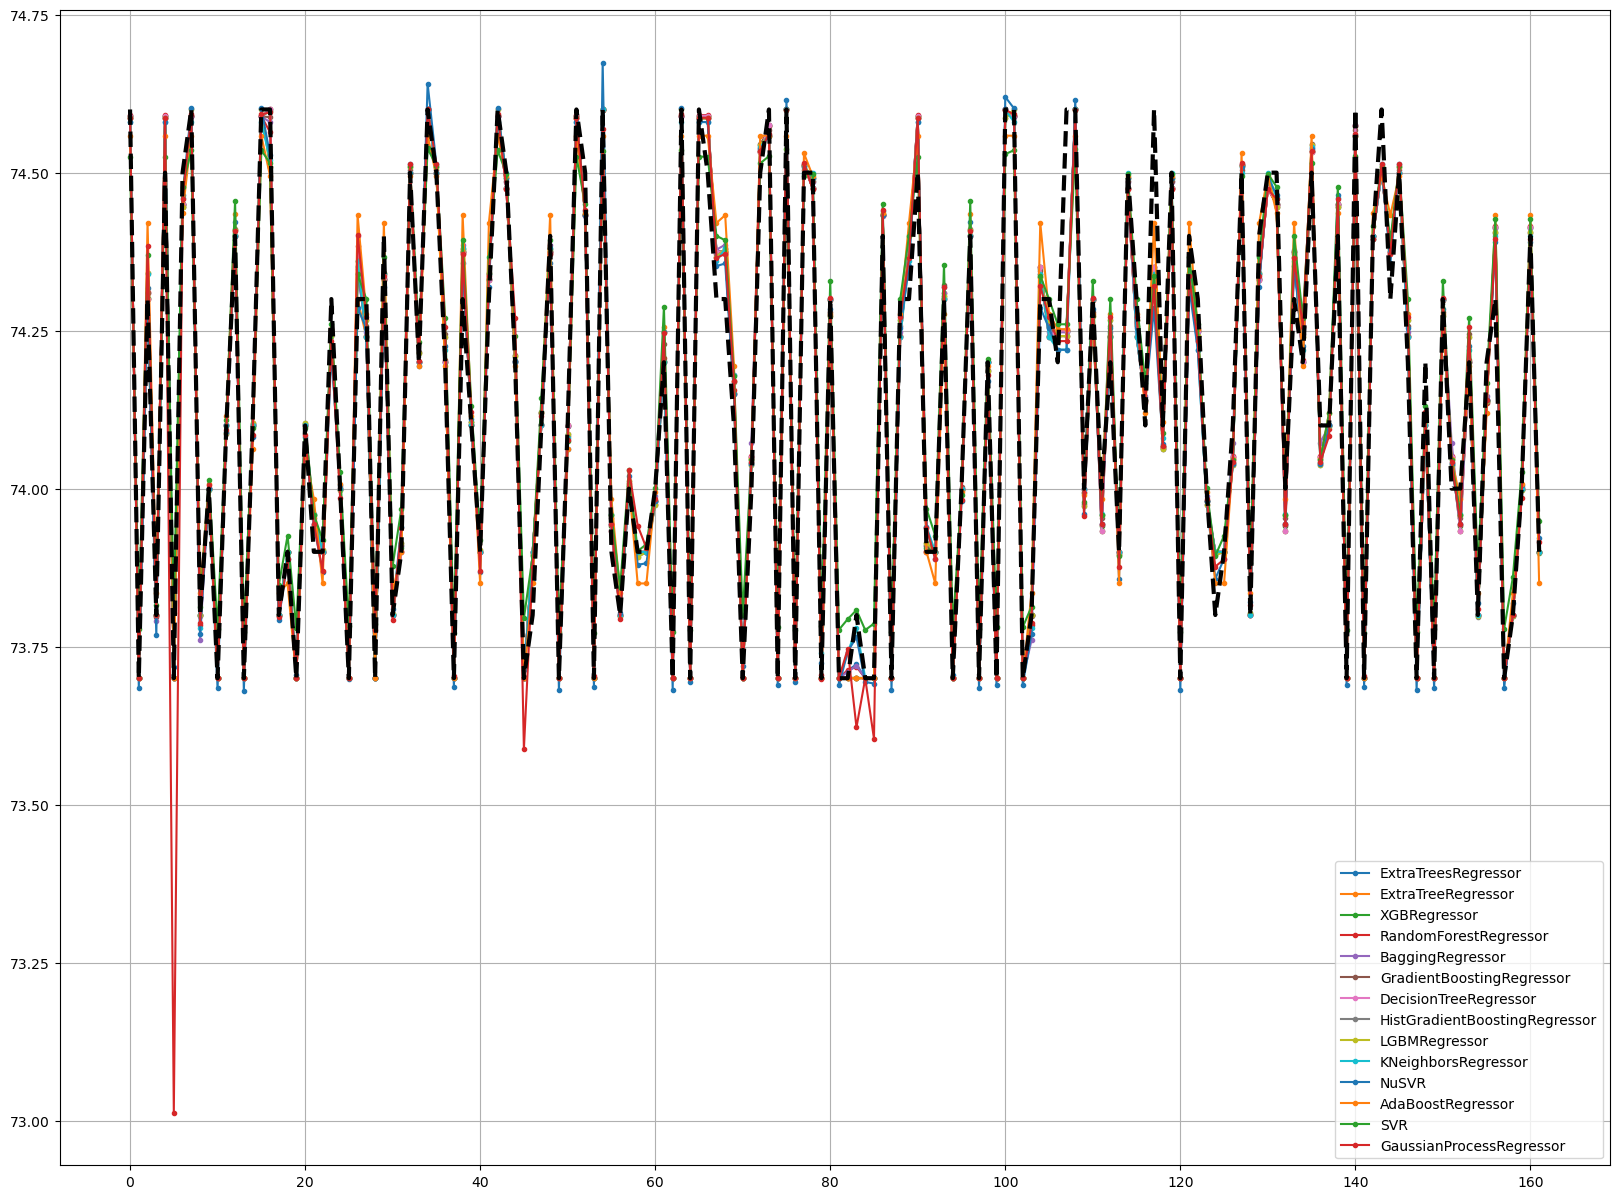

In [103]:
predictions[models.index].plot(figsize=(20,15),marker='.',grid=True)
plt.plot(datasets[0]['y_test'],'--k',linewidth=3)
plt.show()

In [104]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None,predictions=True)
models, predictions = reg.fit(datasets[1]['X_train'],datasets[1]['X_test'],datasets[1]['y_train'],datasets[1]['y_test'])
models=models[models['RMSE']<0.1]
models

100%|██████████| 42/42 [00:00<00:00, 59.59it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 257, number of used features: 2
[LightGBM] [Info] Start training from score 75.119455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.99,0.99,0.04,0.05
NuSVR,0.99,0.99,0.04,0.01
RandomForestRegressor,0.99,0.99,0.04,0.07
KNeighborsRegressor,0.99,0.99,0.04,0.00
BaggingRegressor,0.99,0.99,0.04,0.01
ExtraTreesRegressor,0.99,0.99,0.04,0.04
ExtraTreeRegressor,0.99,0.99,0.04,0.00
HistGradientBoostingRegressor,0.99,0.99,0.04,0.08
LGBMRegressor,0.99,0.99,0.04,0.02


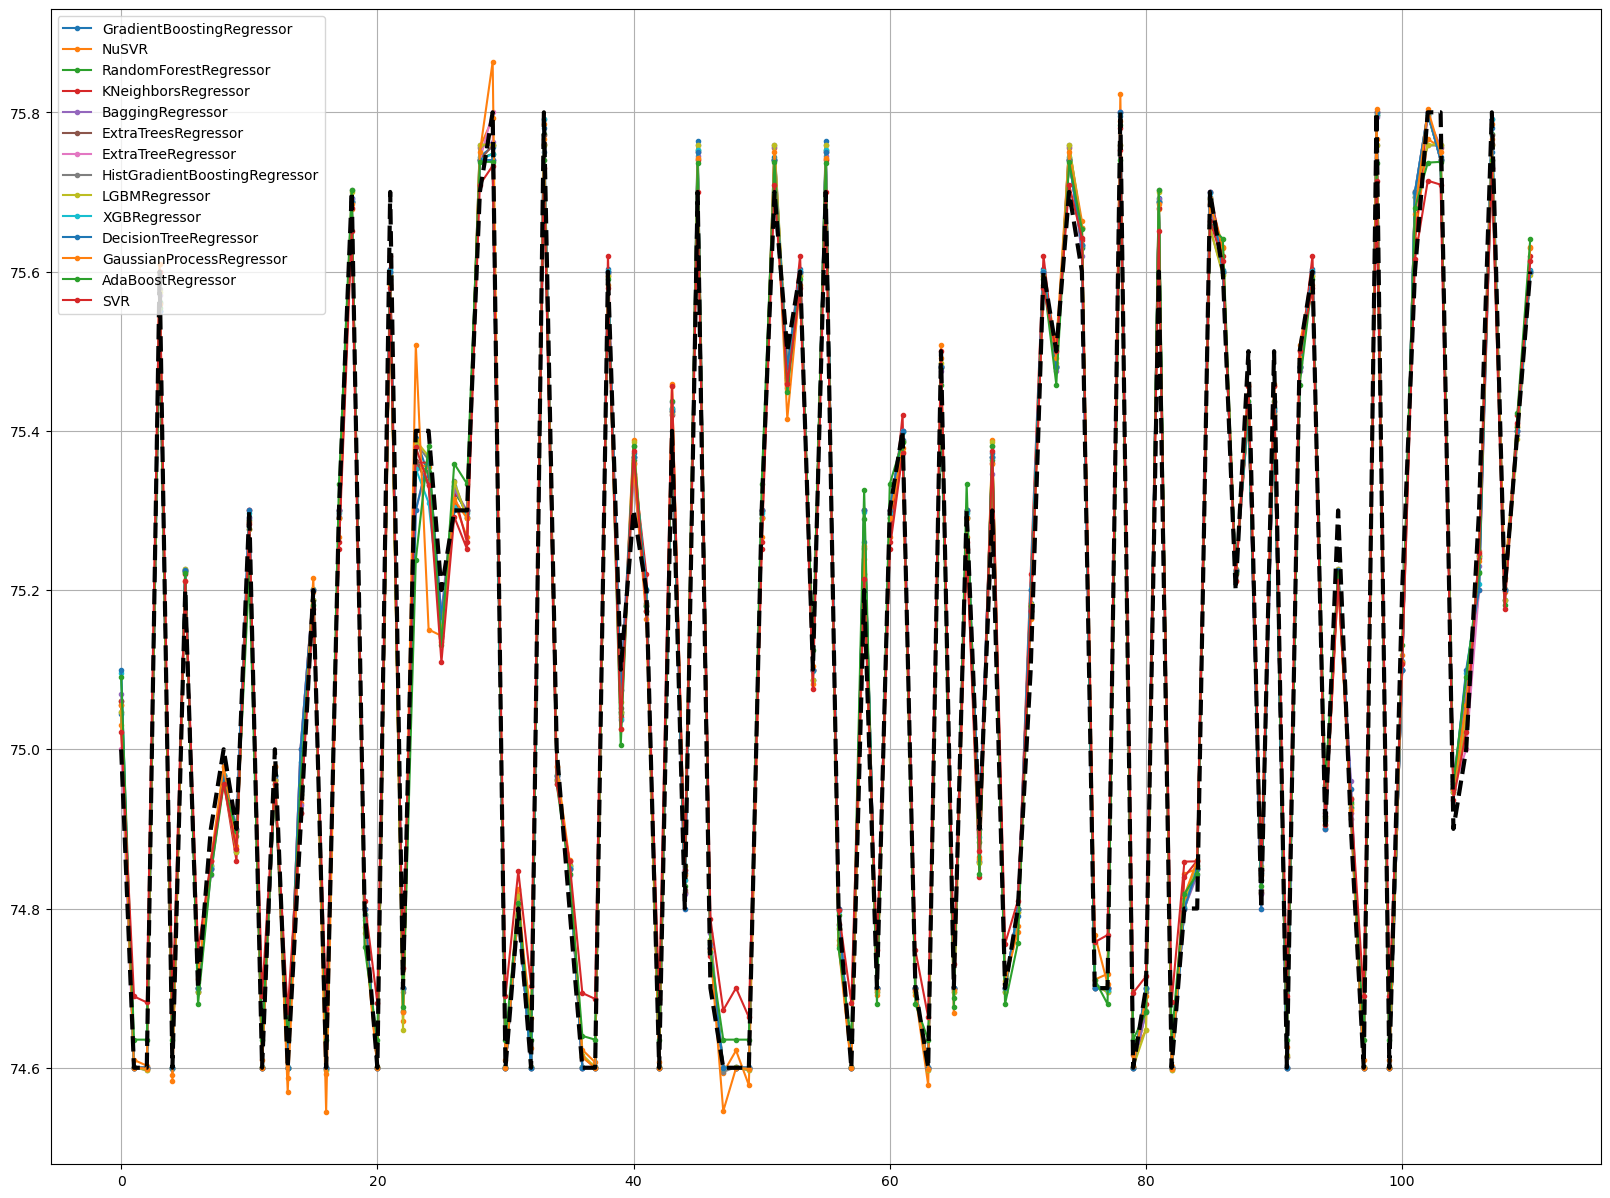

In [105]:
predictions[models.index].plot(figsize=(20,15),marker='.',grid=True)
plt.plot(datasets[1]['y_test'],'--k',linewidth=3)
plt.show()

In [106]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None,predictions=True)
models, predictions = reg.fit(datasets[2]['X_train'],datasets[2]['X_test'],datasets[2]['y_train'],datasets[2]['y_test'])
models=models[models['RMSE']<0.1]
models

100%|██████████| 42/42 [00:00<00:00, 51.32it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 2
[LightGBM] [Info] Start training from score 81.739526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,1.00,1.00,0.05,0.01
PoissonRegressor,1.00,1.00,0.05,0.01
KNeighborsRegressor,1.00,1.00,0.05,0.01
GaussianProcessRegressor,1.00,1.00,0.05,0.01
RandomForestRegressor,1.00,1.00,0.06,0.08
SGDRegressor,1.00,1.00,0.06,0.00
HuberRegressor,1.00,1.00,0.06,0.01
RidgeCV,1.00,1.00,0.06,0.01
GradientBoostingRegressor,1.00,1.00,0.06,0.04


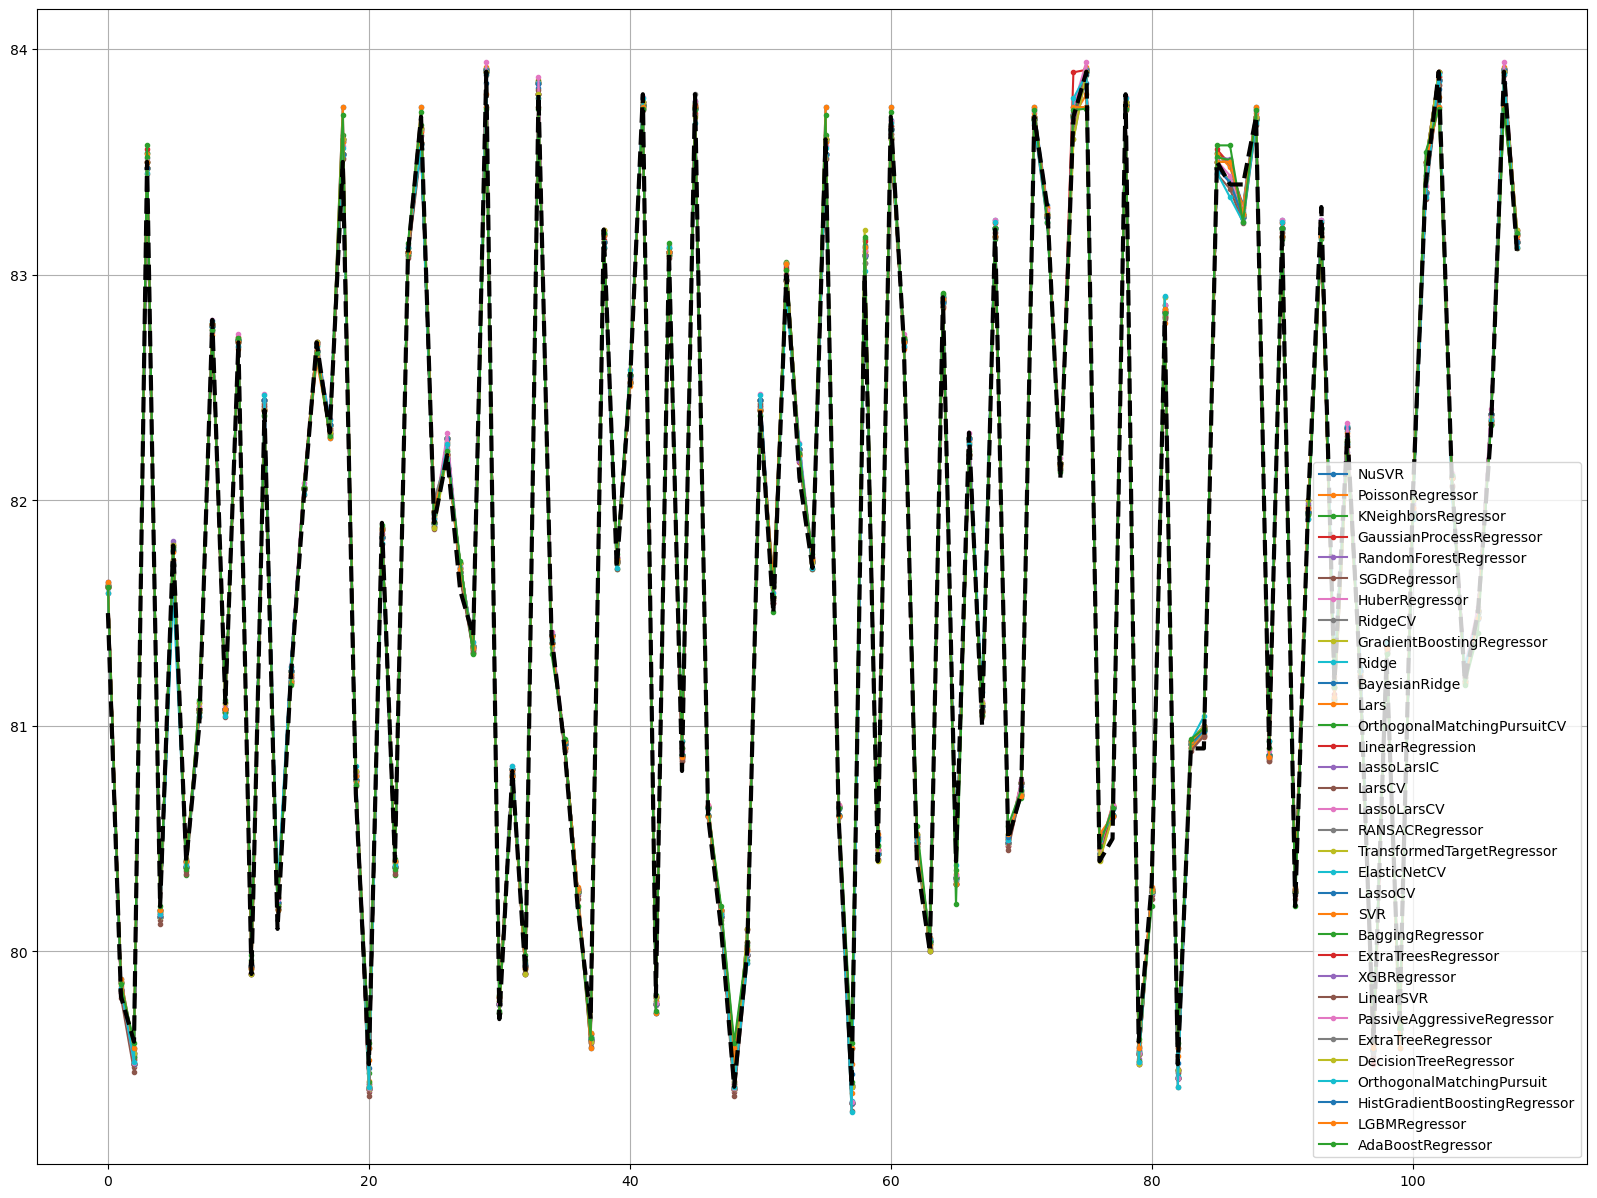

In [107]:
predictions[models.index].plot(figsize=(20,15),marker='.',grid=True)
plt.plot(datasets[2]['y_test'],'--k',linewidth=3)
plt.show()

In [124]:
train_set = TensorDataset(torch.tensor(datasets[0]['X_train'],dtype=torch.float32),torch.tensor(datasets[0]['y_train'],dtype=torch.float32))
test_set = TensorDataset(torch.tensor(datasets[0]['X_test'],dtype=torch.float32),torch.tensor(datasets[0]['y_test'],dtype=torch.float32))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

train_set[0]

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
input_size = 2
hidden_size = 8
output_size = 1
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
num_epochs = 200

model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.0477
Epoch [20/200], Loss: 0.0626
Epoch [30/200], Loss: 0.0562
Epoch [40/200], Loss: 0.0217
Epoch [50/200], Loss: 0.0417
Epoch [60/200], Loss: 0.0015
Epoch [70/200], Loss: 0.0339
Epoch [80/200], Loss: 0.0001
Epoch [90/200], Loss: 0.0759
Epoch [100/200], Loss: 0.0004
Epoch [110/200], Loss: 0.0285
Epoch [120/200], Loss: 0.0073
Epoch [130/200], Loss: 0.0228
Epoch [140/200], Loss: 0.0082
Epoch [150/200], Loss: 0.0097
Epoch [160/200], Loss: 0.0088
Epoch [170/200], Loss: 0.0033
Epoch [180/200], Loss: 0.0026
Epoch [190/200], Loss: 0.0261
Epoch [200/200], Loss: 0.0072


Text(0.5, 1.0, 'RMSE: 0.1196')

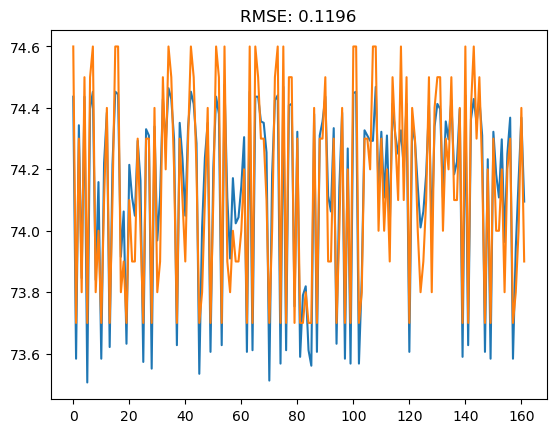

In [126]:
model.eval()
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.squeeze().numpy())
predictions = np.array(predictions)
predictions = predictions.flatten()
predictions

mse= np.mean((predictions - datasets[0]['y_test'])**2)
rmse = np.sqrt(mse)

plt.plot(predictions)
plt.plot(datasets[0]['y_test'])
plt.title(f'RMSE: {rmse:.4f}')

In [127]:
train_set = TensorDataset(torch.tensor(datasets[1]['X_train'],dtype=torch.float32),torch.tensor(datasets[1]['y_train'],dtype=torch.float32))
test_set = TensorDataset(torch.tensor(datasets[1]['X_test'],dtype=torch.float32),torch.tensor(datasets[1]['y_test'],dtype=torch.float32))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
num_epochs = 200

model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 9.8578
Epoch [20/200], Loss: 0.3291
Epoch [30/200], Loss: 0.0701
Epoch [40/200], Loss: 0.2026
Epoch [50/200], Loss: 0.0079
Epoch [60/200], Loss: 0.0474
Epoch [70/200], Loss: 0.0465
Epoch [80/200], Loss: 0.0367
Epoch [90/200], Loss: 0.0325
Epoch [100/200], Loss: 0.0024
Epoch [110/200], Loss: 0.1206
Epoch [120/200], Loss: 0.1120
Epoch [130/200], Loss: 0.0019
Epoch [140/200], Loss: 0.0527
Epoch [150/200], Loss: 0.0173
Epoch [160/200], Loss: 0.0592
Epoch [170/200], Loss: 0.0051
Epoch [180/200], Loss: 0.0488
Epoch [190/200], Loss: 0.0111
Epoch [200/200], Loss: 0.0555


Text(0.5, 1.0, 'RMSE: 0.1832')

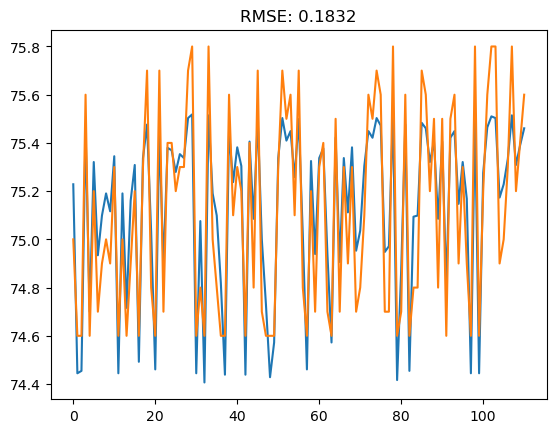

In [131]:
model.eval()
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.squeeze().numpy())
predictions = np.array(predictions)
predictions = predictions.flatten()
predictions

mse= np.mean((predictions - datasets[1]['y_test'])**2)
rmse = np.sqrt(mse)

plt.plot(predictions)
plt.plot(datasets[1]['y_test'])
plt.title(f'RMSE: {rmse:.4f}')

In [133]:
train_set = TensorDataset(torch.tensor(datasets[2]['X_train'],dtype=torch.float32),torch.tensor(datasets[2]['y_train'],dtype=torch.float32))
test_set = TensorDataset(torch.tensor(datasets[2]['X_test'],dtype=torch.float32),torch.tensor(datasets[2]['y_test'],dtype=torch.float32))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
num_epochs = 200

model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 52.9752
Epoch [20/200], Loss: 3.3921
Epoch [30/200], Loss: 0.1130
Epoch [40/200], Loss: 0.1558
Epoch [50/200], Loss: 0.0090
Epoch [60/200], Loss: 0.0000
Epoch [70/200], Loss: 0.0011
Epoch [80/200], Loss: 0.0050
Epoch [90/200], Loss: 0.0166
Epoch [100/200], Loss: 0.0036
Epoch [110/200], Loss: 0.0076
Epoch [120/200], Loss: 0.0271
Epoch [130/200], Loss: 0.0332
Epoch [140/200], Loss: 0.0013
Epoch [150/200], Loss: 0.0432
Epoch [160/200], Loss: 0.0000


KeyboardInterrupt: 

Text(0.5, 1.0, 'RMSE: 0.1524')

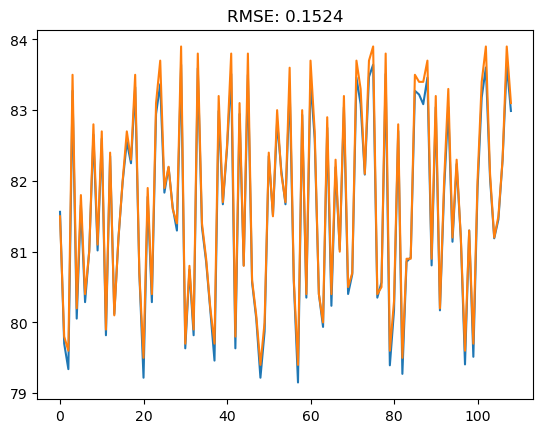

In [134]:
model.eval()
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.squeeze().numpy())
predictions = np.array(predictions)
predictions = predictions.flatten()
predictions

mse= np.mean((predictions - datasets[2]['y_test'])**2)
rmse = np.sqrt(mse)

plt.plot(predictions)
plt.plot(datasets[2]['y_test'])
plt.title(f'RMSE: {rmse:.4f}')